In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np # Necesario si vas a usar numpy


ds_xr = xr.open_dataset('D:\Descargas\precip.mon.mean.nc')
ds_xr['time'] = xr.date_range(start='1979-01', periods=len(ds_xr.time), freq='MS', use_cftime=True)
#Es una sola línea
print(ds_xr)
# Coordenadas aproximadas: Longitud -75° a -65°, Latitud -10°S a -20°S
#ds_peru_sur = ds_xr.sel(lon=slice(-75, -65), lat=slice(-10, -20)) # Adapta los rangos si es necesario
ds_peru_sur = ds_xr.sel(lon=slice(260, 300), lat=slice(20, -20))

base = ds_peru_sur.sel(time=slice('1981-01', '2010-12'))
clim = base.groupby('time.month').mean('time')
anom = ds_peru_sur.groupby('time.month') - clim

clim.precip.sel(month=1).plot(
    cmap="Blues",
    cbar_kwargs={"label": "Precipitación (mm/día)"}
)
plt.title("Climatología de Precipitación - Enero (1981–2010)")
plt.show()

<xarray.Dataset> Size: 23MB
Dimensions:    (lat: 72, lon: 144, time: 560, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) object 4kB 1979-01-01 00:00:00 ... 2025-08-01 00:00:00
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 23MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR S

TypeError: No numeric data to plot.

In [14]:
import matplotlib.pyplot as plt

# Graficando climatología de enero
clim.precip.sel(month=1).plot(
    cmap="Blues",
    cbar_kwargs={"label": "Precipitación (mm/día)"}
)
plt.title("Climatología de Precipitación - Enero (1981–2010)")
plt.show()


TypeError: No numeric data to plot.

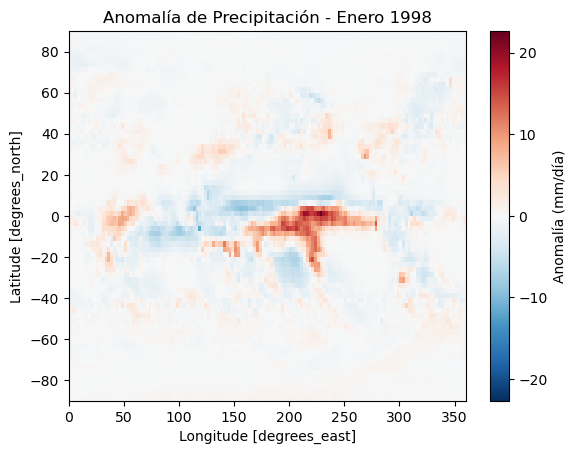

In [20]:
# Graficar anomalía de enero 1998 (evento El Niño)
anom.sel(time="1998-01").precip.plot(
cmap="RdBu_r",
cbar_kwargs={"label": "Anomalía (mm/día)"}
)
plt.title("Anomalía de Precipitación - Enero 1998")
plt.show()

C:\Users\PC- LIUBA RAMOS\AppData\Local\Temp\ipykernel_7776\3678213665.py:5: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  time = pre.indexes['time'].to_datetimeindex()


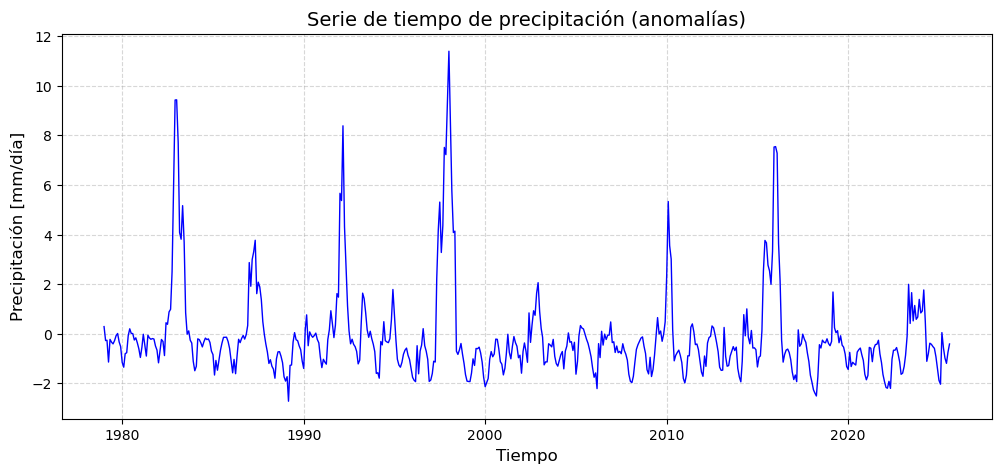

In [28]:
serie = anom.sel(lat=slice(-5,5), lon=slice(190,240)).mean(['lat','lon'])
# Extraer la variable de interés
pre = serie['precip']
# Convertir el eje temporal a datetime64
time = pre.indexes['time'].to_datetimeindex()

# Graficar con matplotlib
plt.figure(figsize=(12,5))
plt.plot(time, pre.values, color='blue', linewidth=1)

plt.title("Serie de tiempo de precipitación (anomalías)", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Precipitación [mm/día]", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

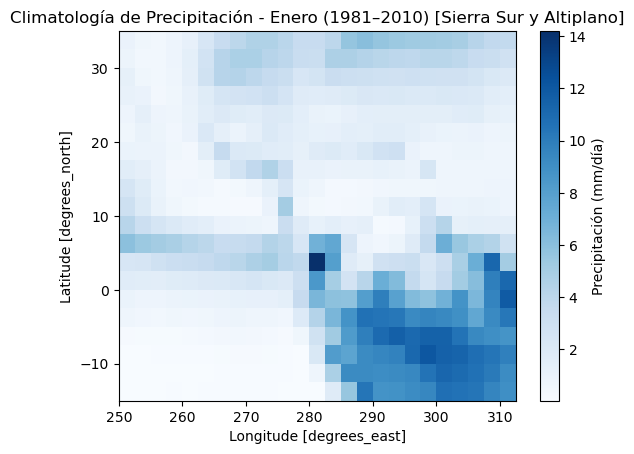

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# --- 1. CARGA Y CORRECCIÓN DE TIEMPO ---
ds_xr = xr.open_dataset('D:\Descargas\precip.mon.mean.nc')
ds_xr['time'] = xr.date_range(start='1979-01', periods=len(ds_xr.time), freq='MS', use_cftime=True)

# --- 2. DELIMITACIÓN DE ÁREA Y CÁLCULO ---

# 3. **SOLUCIÓN FINAL: SELECCIÓN POR ÍNDICE (.isel)**
# Selecciona los píxeles de la matriz que caen sobre Sudamérica
# lon: Índices 100 a 125 (Aprox. 250°E a 312°E)
# lat: Índices 30 a 50 (Aprox. -10°S a -20°S, pero con margen)
ds_peru_sur = ds_xr.isel(lon=slice(100, 125), lat=slice(30, 50)) # ¡Esto debe funcionar!

# 4. Define el periodo base y calcula la climatología
base = ds_peru_sur.sel(time=slice('1981-01', '2010-12'))
clim = base.groupby('time.month').mean('time')

# 5. Grafica la climatología de Enero
clim.precip.sel(month=1).plot(
    cmap="Blues",
    cbar_kwargs={"label": "Precipitación (mm/día)"}
)
plt.title("Climatología de Precipitación - Enero (1981–2010) [Sierra Sur y Altiplano]")
plt.show()

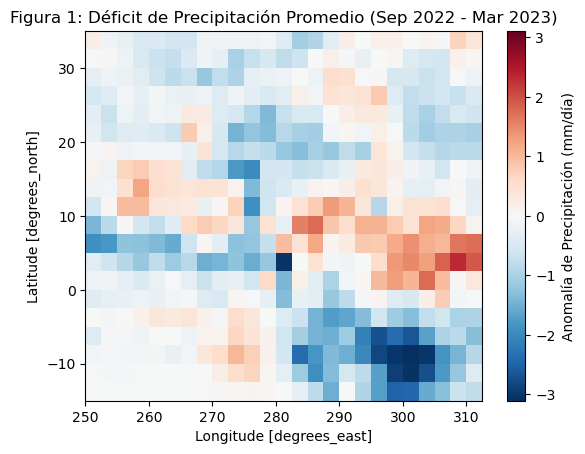

In [5]:
# 'anom' ahora contiene las anomalías mensuales para toda la Sierra Sur (1979 - 2025)
anom = ds_peru_sur.groupby('time.month') - clim

# 1. Calcular el promedio de la anomalía SOLO en la temporada de sequía
anom_sequia_media = anom.sel(time=slice('2022-09', '2023-03')).mean('time')

# 2. Graficar el Mapa de Anomalía
anom_sequia_media.precip.plot(
    cmap="RdBu_r", # RdBu_r usa rojos para déficit (negativo) y azules para exceso
    center=0,      # Centra el mapa de colores en cero
    cbar_kwargs={"label": "Anomalía de Precipitación (mm/día)"}
)
plt.title("Figura 1: Déficit de Precipitación Promedio (Sep 2022 - Mar 2023)")
plt.show()

C:\Users\PC- LIUBA RAMOS\AppData\Local\Temp\ipykernel_10952\291580048.py:16: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  time_sequia_plot = sequia_plot.indexes['time'].to_datetimeindex()


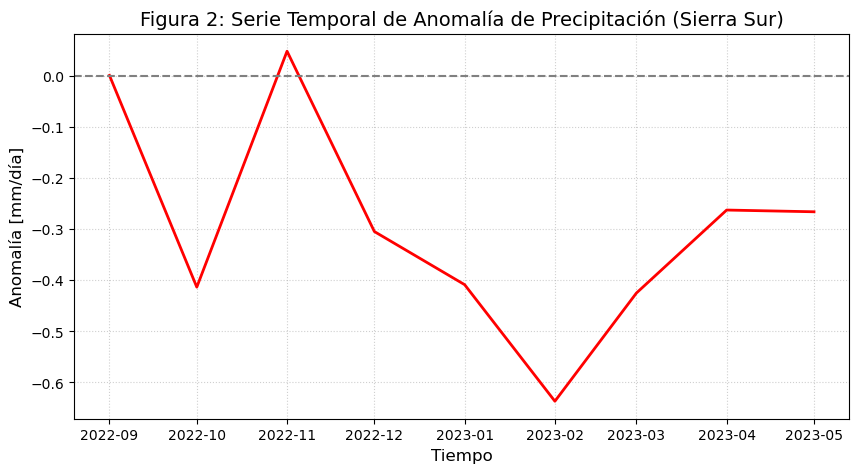

In [7]:
import matplotlib.pyplot as plt
import numpy as np # Necesario para asegurar la manipulación de arrays

# ... (Bloques de código anteriores para calcular 'anom')
# ... (Asumiendo que 'anom' y 'ds_peru_sur' ya existen)

# 1. Promedio Espacial de la Anomalía (un solo valor por mes para toda la región)
serie_anomalia = anom.mean(['lat','lon'])
pre = serie_anomalia['precip']

# 2. **Filtramos SOLO la sequía 2022-2023** para el gráfico de interés
sequia_plot = pre.sel(time=slice('2022-09', '2023-05'))

# 3. **¡CORRECCIÓN AQUÍ!** Convertir el eje X a un formato estándar de Python.
# Extraemos el índice temporal de xarray y lo convertimos a un índice de tiempo estándar.
time_sequia_plot = sequia_plot.indexes['time'].to_datetimeindex()

# 4. Graficar la serie temporal de la sequía
plt.figure(figsize=(10, 5))
# Usamos la variable de tiempo corregida: time_sequia_plot
plt.plot(time_sequia_plot, sequia_plot.values, color='red', linewidth=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Figura 2: Serie Temporal de Anomalía de Precipitación (Sierra Sur)", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Anomalía [mm/día]", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.6)
plt.show()

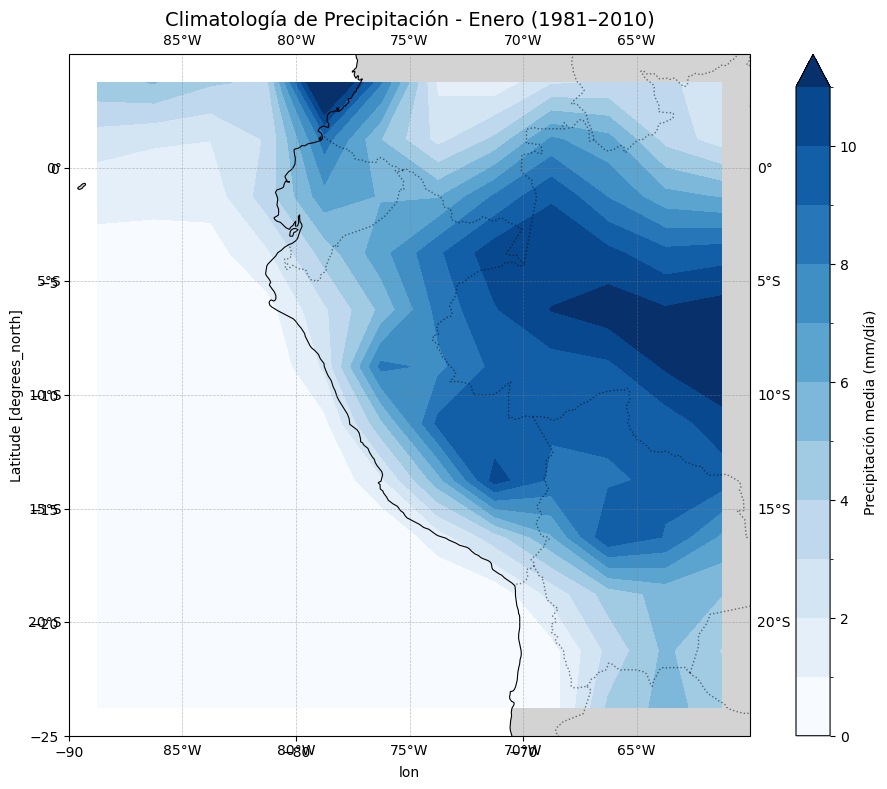

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# --- 1. CARGA Y CORRECCIÓN DE TIEMPO ---
ds_xr = xr.open_dataset('D:\Descargas\precip.mon.mean.nc')

# Corregir el índice de tiempo (Es importante usar datetime para el slicing)
ds_xr['time'] = xr.date_range(start='1979-01', periods=len(ds_xr.time), freq='MS')

# Convertir longitudes de 0-360 a -180 a 180 (Necesario para usar el slice -90 a -60)
ds_xr = ds_xr.assign_coords(lon=(((ds_xr.lon + 180) % 360) - 180)).sortby('lon')

# --- 2. DELIMITACIÓN DE ÁREA Y CÁLCULO ---

# ¡SOLUCIÓN APLICADA! Invertir el slice de latitud de menor a mayor valor.
ds_sudamerica = ds_xr.sel(
    lat=slice(-25, 5),  # CAMBIO: De -25°S a 5°N (orden ascendente)
    lon=slice(-90, -60) 
)

# 3. Define el periodo base y calcula la climatología
base = ds_sudamerica.sel(time=slice('1981-01', '2010-12'))
clim = base.groupby('time.month').mean('time')

# 4. GRAFICADO CON CARTOPY
data_to_plot = clim.precip.sel(month=1)

# Crear la figura y los ejes de Cartopy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Configurar el zoom del mapa
ax.set_extent([-90, -60, -25, 5], crs=ccrs.PlateCarree())

# Dibujar las líneas de costa y las fronteras
ax.coastlines(resolution='50m', color='black', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Graficar los datos de precipitación
h = data_to_plot.plot.contourf(
    ax=ax,
    levels=np.arange(0, 12, 1),
    cmap="Blues",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Precipitación media (mm/día)", "orientation": "vertical"}
)

# Añadir títulos y etiquetas
ax.set_title("Climatología de Precipitación - Enero (1981–2010)", fontsize=14)
ax.set_xticks(np.arange(-90, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-25, 5, 5), crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# ASUMIENDO que ds_xr, ds_sudamerica, clim, anom, y anom_sequia_media
# YA han sido definidos correctamente en pasos anteriores (incluyendo la conversión de lon)

# --- 1. SELECCIÓN DE DATOS (Asegurar que sea el objeto correcto para graficar) ---
# Usamos el objeto que contiene el promedio del periodo de sequía
data_to_plot = anom_sequia_media.precip 

# --- 2. GRAFICADO CON CARTOPY ---

# Crear la figura y los ejes de Cartopy
fig = plt.figure(figsize=(10, 8))
# Usamos la misma proyección estándar
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 

# Configurar el zoom del mapa (el mismo área de Sudamérica que usamos antes)
ax.set_extent([-90, -60, -25, 5], crs=ccrs.PlateCarree()) 

# --- ADICIÓN DE CAPAS GEOGRÁFICAS (LA SOLUCIÓN VISUAL) ---
ax.coastlines(resolution='50m', color='black', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray') # Esto hace que los continentes se vean grises

# Graficar los datos de anomalía
h = data_to_plot.plot.contourf(
    ax=ax,
    # Sugiero niveles simétricos para resaltar el déficit y exceso (e.g., de -5 a 5)
    levels=np.arange(-5, 5.5, 0.5), 
    cmap="RdBu_r", # Rojo para déficit (negativo) y Azul para exceso (positivo)
    center=0,      # Centra la barra de colores en cero (crucial para anomalías)
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Anomalía de Precipitación (mm/día)", "orientation": "vertical"}
)

# Añadir títulos y etiquetas
ax.set_title("Figura 1: Anomalía de Precipitación (Sep 2022 – Mar 2023)", fontsize=14)
ax.set_xticks(np.arange(-90, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-25, 5, 5), crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

NameError: name 'anom_sequia_media' is not defined

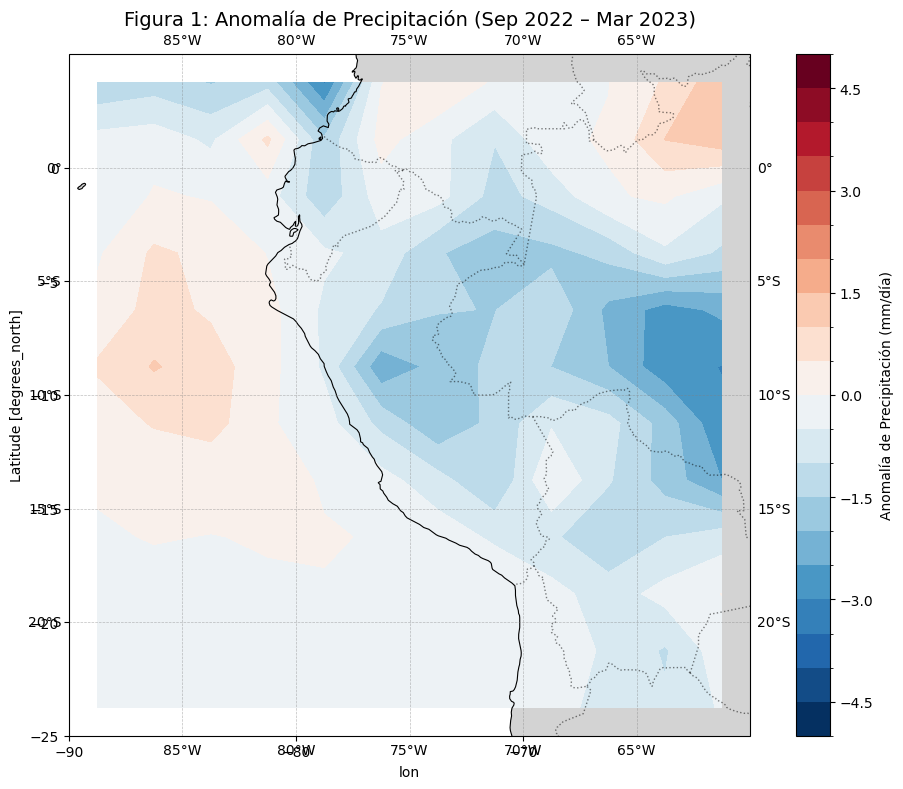

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# ASUME que ds_xr ya está cargado desde el archivo 'precip.mon.mean.nc'
# ds_xr = xr.open_dataset('D:\Descargas\precip.mon.mean.nc') 

# --- 1. PREPARACIÓN INICIAL DE DATOS (Necesaria para todo el análisis) ---
# Corregir el índice de tiempo
ds_xr['time'] = xr.date_range(start='1979-01', periods=len(ds_xr.time), freq='MS')

# Convertir longitudes de 0-360 a -180 a 180 (necesario para la selección)
ds_xr = ds_xr.assign_coords(lon=(((ds_xr.lon + 180) % 360) - 180)).sortby('lon')

# Delimitar el área de interés: Sudamérica/Altiplano
ds_sudamerica = ds_xr.sel(
    lat=slice(-25, 5),  # De -25°S a 5°N (orden ascendente)
    lon=slice(-90, -60) 
)

# --- 2. CÁLCULO DE LA ANOMALÍA Y PROMEDIO DE LA SEQUÍA ---

# Define el periodo base y calcula la climatología
base = ds_sudamerica.sel(time=slice('1981-01', '2010-12'))
clim = base.groupby('time.month').mean('time')

# 2.1. Calcular la Anomalía Mensual (Anomalía = Dato Bruto - Climatología)
anom = ds_sudamerica.groupby('time.month') - clim

# 2.2. Calcular el Promedio Temporal de la Anomalía (El mapa final)
anom_sequia_media = anom.sel(time=slice('2022-09', '2023-03')).mean('time')
data_to_plot = anom_sequia_media.precip # AHORA 'anom_sequia_media' está definido

# --- 3. GRAFICADO CON CARTOPY (Figura 1) ---

# Crear la figura y los ejes de Cartopy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 

# Configurar el zoom del mapa
ax.set_extent([-90, -60, -25, 5], crs=ccrs.PlateCarree()) 

# Dibujar las capas geográficas
ax.coastlines(resolution='50m', color='black', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray') 

# Graficar los datos de anomalía
h = data_to_plot.plot.contourf(
    ax=ax,
    levels=np.arange(-5, 5.5, 0.5), # Niveles simétricos
    cmap="RdBu_r", 
    center=0,      
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Anomalía de Precipitación (mm/día)", "orientation": "vertical"}
)

# Añadir títulos y etiquetas
ax.set_title("Figura 1: Anomalía de Precipitación (Sep 2022 – Mar 2023)", fontsize=14)
ax.set_xticks(np.arange(-90, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-25, 5, 5), crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()